# Laboratorio 10
Andrea Lam 20102
Kenneth Galvez 20079
Jose Mariano Reyes 20074

In [21]:
# !pip install pyreadstat
# !pip install seaborn

## Parte 1

### 1. Carga y Limpieza de Datos:
- Importar el conjunto de datos.
- Identificar y tratar valores faltantes.
- Normalizar nombres de columnas

In [22]:
import pandas as pd

# Lee el archivo .sav
datos_hogar = pd.read_spss('Datos_Lab/ENCOVI_Hogar.sav')

# Identifica valores faltantes
valores_faltantes = datos_hogar.isna().sum()

datos_hogar.head()

# normalizar columnas
nuevos_nombres = {
    'PPB01': 'cocinan',
    'PPB02': 'hogares_en_vivienda',
    'PPB04': 'personas_en_hogar',
    'PPD04A': 'total_personas',
    'PPD04B': 'entrevistadas',
    'PPD04C': 'no_entrevistadas',
    'PPD06': 'idioma_hablado',
    'P01A02': 'material_hogar',
    'P01A05A': 'agua',
    'P01A05B': 'drenajes',
    'P01A05C': 'electricidad',
    'P01A05D': 'telefono',
}

# Renombra las columnas
datos_hogar = datos_hogar.rename(columns=nuevos_nombres)


In [23]:
# Lee el archivo .sav
datos_personas = pd.read_spss('Datos_Lab/ENCOVI_Personas.sav')

# Identifica valores faltantes
valores_faltantes = datos_personas.isna().sum()

datos_personas.head()

# normalizar columnas
nuevos_nombres = {
    'PPB01': 'cocinan',
    'PPB02': 'hogares_en_vivienda',
    'PPB04': 'personas_en_hogar',
    'PPD04A': 'total_personas',
    'PPD04B': 'entrevistadas',
    'PPD04C': 'no_entrevistadas',
    'PPD06': 'idioma_hablado',
    'P01A02': 'material_hogar',
    'P01A05A': 'agua',
    'P01A05B': 'drenajes',
    'P01A05C': 'electricidad',
    'P01A05D': 'telefono',
    'P10B05': 'contrato',
    'P10B08': 'sueldo',
    'P10B20B': 'precio_vivienda'
}

# Renombra las columnas
datos_personas = datos_personas.rename(columns=nuevos_nombres)

### 2.  Análisis Univariable:
- Estadísticas descriptivas (media, mediana, moda).
- Distribuciones de variables importantes mediante histogramas o boxplots.


count        11536
unique           3
top       No pobre
freq          5639
Name: POBREZA, dtype: object
count    11536.000000
mean         4.752254
std          2.355452
min          1.000000
25%          3.000000
50%          4.000000
75%          6.000000
max         20.000000
Name: THOGAR, dtype: float64


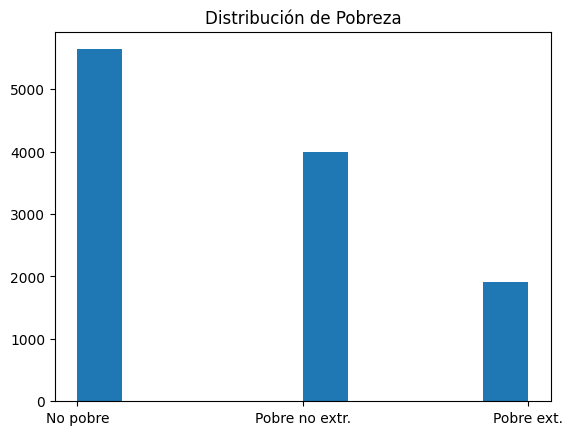

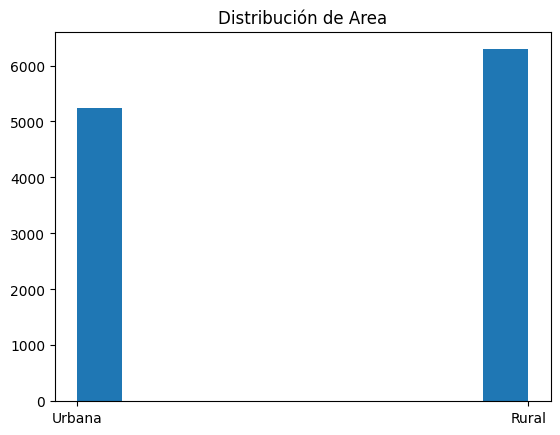

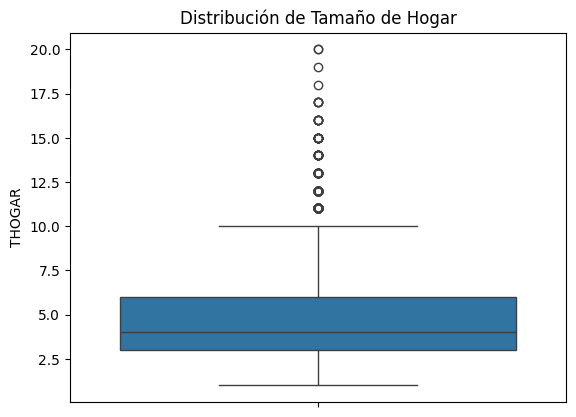

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Estadísticas descriptivas 
print(datos_hogar['POBREZA'].describe())
print(datos_hogar['THOGAR'].describe())

# Histograma
plt.hist(datos_hogar['POBREZA'])
plt.title('Distribución de Pobreza')
plt.show()

# Histograma
plt.hist(datos_hogar['AREA'])
plt.title('Distribución de Area')
plt.show()

# Boxplot
sns.boxplot(datos_hogar['THOGAR'])
plt.title('Distribución de Tamaño de Hogar')
plt.show()


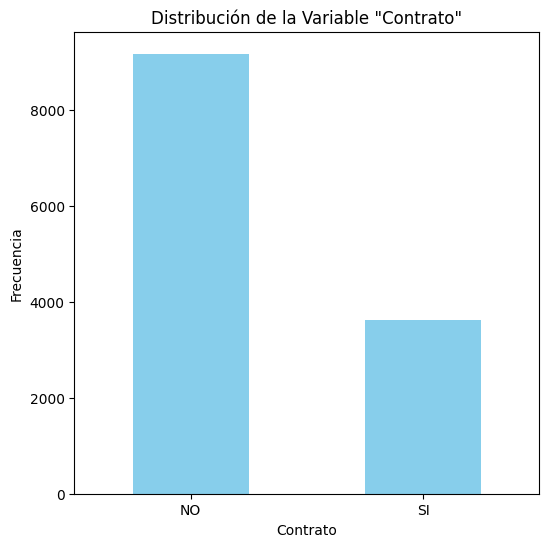

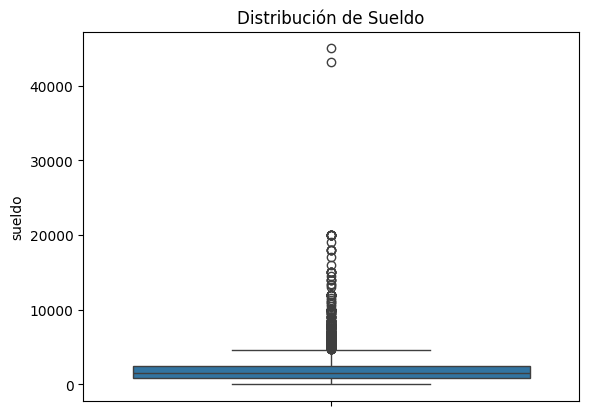

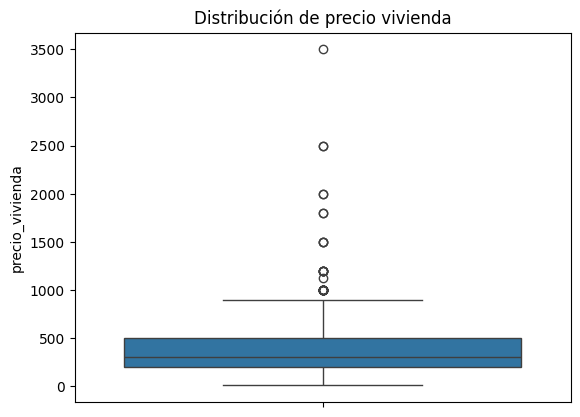

In [25]:
# Estadísticas descriptivas 
contrato = datos_personas['contrato']

# Cuenta la frecuencia de cada valor y reemplaza los NaN por 'Desconocido'
frecuencia = contrato.value_counts().fillna(0)

# Crear un gráfico de barras
plt.figure(figsize=(6, 6))
frecuencia.plot(kind='bar', color='skyblue')
plt.xlabel('Contrato')
plt.ylabel('Frecuencia')
plt.title('Distribución de la Variable "Contrato"')
plt.xticks(rotation=0)  # Evita que las etiquetas del eje x estén inclinadas
plt.show()

# Boxplot
sns.boxplot(datos_personas['sueldo'])
plt.title('Distribución de Sueldo')
plt.show()

# Boxplot
sns.boxplot(datos_personas['precio_vivienda'])
plt.title('Distribución de precio vivienda')
plt.show()

### 3. Análisis Bivariable:
- Correlaciones entre variables.
- Scatter plots para relaciones entre pares de variables.

POBREZA
No pobre          5639
Pobre no extr.    3989
Pobre ext.        1908
Name: count, dtype: int64
POBREZA
No pobre          48.881761
Pobre no extr.    34.578710
Pobre ext.        16.539528
Name: proportion, dtype: float64
POBREZA  No pobre  Pobre ext.  Pobre no extr.
AREA                                         
Rural        2282        1510            2498
Urbana       3357         398            1491
Cramer V: 2


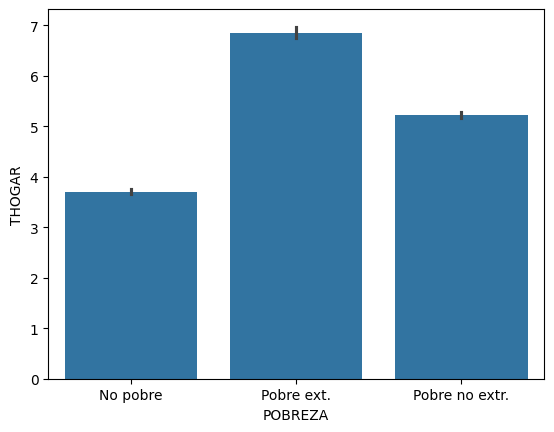

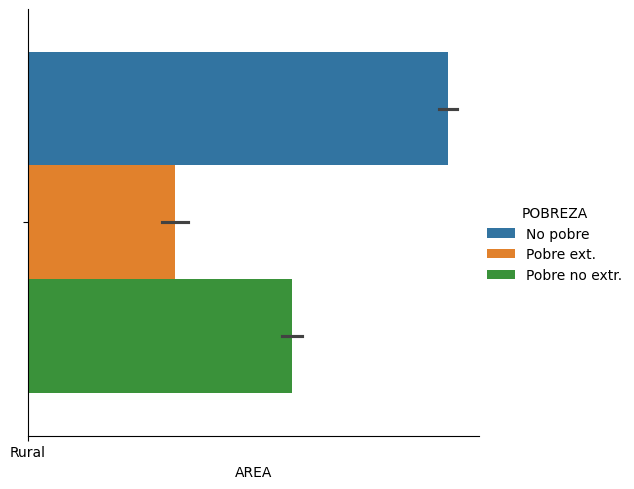

In [26]:
# correlacion entre pobreza y tamano de hogar
datos_hogar['POBREZA'] = datos_hogar['POBREZA'].astype('category')

from scipy.stats import chi2_contingency

print(datos_hogar['POBREZA'].value_counts())
print(datos_hogar['POBREZA'].value_counts(normalize=True) * 100)

sns.barplot(data=datos_hogar, x='POBREZA', y='THOGAR')

# correlacion entre area y porbreza
tabla = pd.crosstab(index=datos_hogar['AREA'], columns=datos_hogar['POBREZA']) 
print(tabla)

chi2, p, cramer_v, esperado = chi2_contingency(tabla)
print('Cramer V:', cramer_v)

sns.catplot(data=datos_hogar, kind="bar", x="AREA", hue="POBREZA")

Poca correlacion entre el area y la pobreza, bastante correlacion entre tamano de hogar y pobreza

Correlación de Pearson entre Sueldo y Precio de la Vivienda: 0.33623211437246775


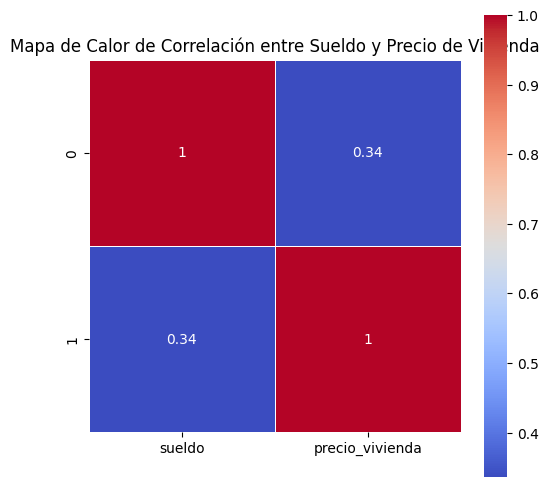

In [27]:
# Calcular la correlación de Pearson entre 'sueldo' y 'precio_vivienda'
correlacion = datos_personas['sueldo'].corr(datos_personas['precio_vivienda'])

print(f"Correlación de Pearson entre Sueldo y Precio de la Vivienda: {correlacion}")

# Calcular la correlación de Pearson entre 'sueldo' y 'precio_vivienda'
correlacion = datos_personas['sueldo'].corr(datos_personas['precio_vivienda'])

# Crear un DataFrame con solo las dos variables de interés
correlacion_df = pd.DataFrame({'sueldo': [1.0, correlacion], 'precio_vivienda': [correlacion, 1.0]})

# Crear un mapa de calor (heatmap) de correlación entre 'sueldo' y 'precio_vivienda'
plt.figure(figsize=(6, 6))
sns.heatmap(correlacion_df, annot=True, cmap='coolwarm', linewidths=0.5, square=True)
plt.title('Mapa de Calor de Correlación entre Sueldo y Precio de Vivienda')
plt.show()

No hay mucha correlacion entre el sueldo y el precio de la vivienda

### 4. Visualización de Datos:
- Utilizar gráficos de barras, pie y heatmaps para representar relaciones y distribuciones.

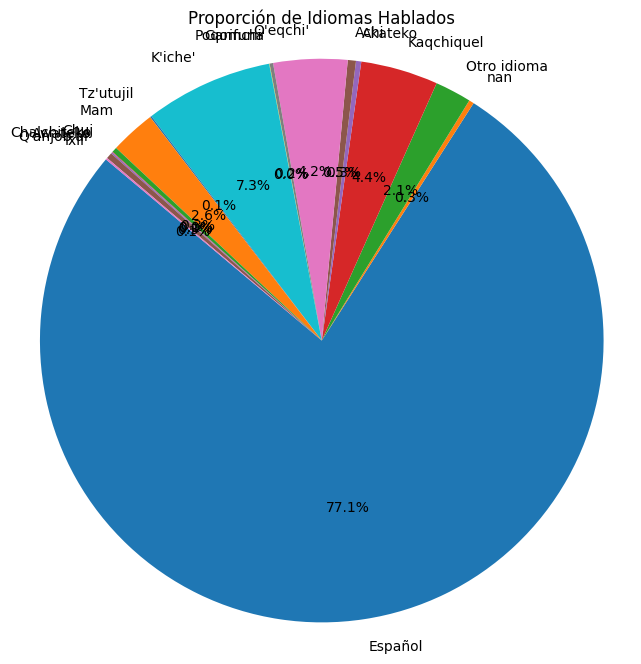

In [28]:
# Puedes cambiar el nombre de la columna si es necesario
idioma_hablado = datos_hogar['idioma_hablado']

# Contar la frecuencia de cada valor
from collections import Counter
frecuencia = Counter(idioma_hablado)

# Crear un gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(frecuencia.values(), labels=frecuencia.keys(), autopct='%1.1f%%', startangle=140)
plt.title('Proporción de Idiomas Hablados')

# Mostrar el gráfico
plt.axis('equal')
plt.show()

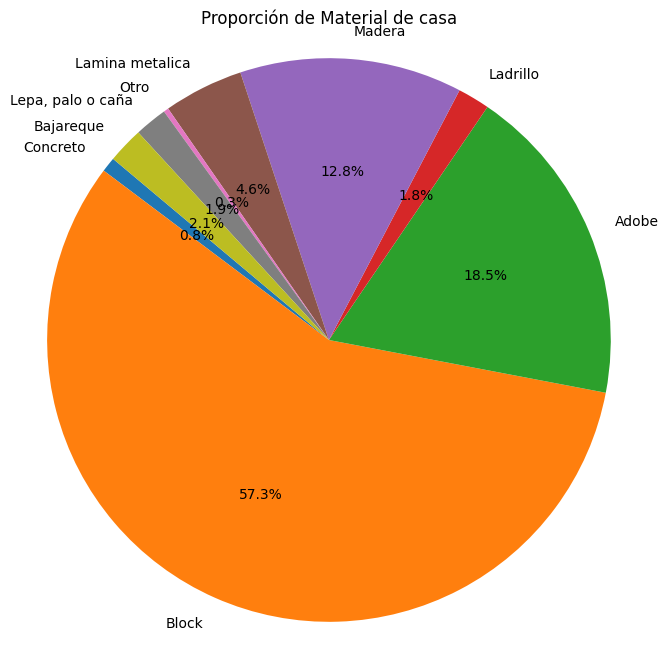

In [29]:
# Puedes cambiar el nombre de la columna si es necesario
material = datos_hogar['material_hogar']

frecuencia = Counter(material)

# Crear un gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(frecuencia.values(), labels=frecuencia.keys(), autopct='%1.1f%%', startangle=140)
plt.title('Proporción de Material de casa')

# Mostrar el gráfico
plt.axis('equal')
plt.show()

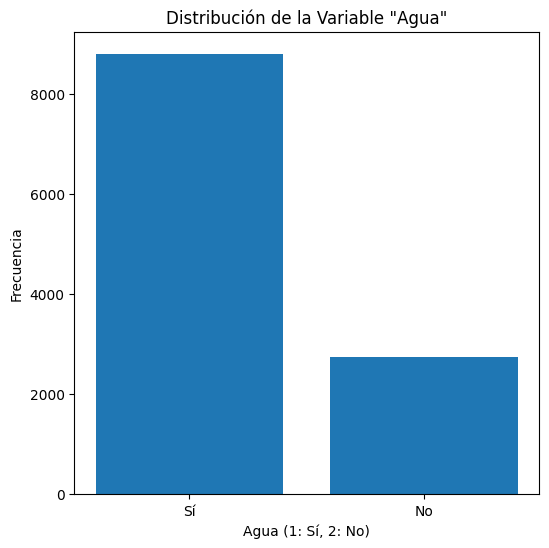

In [30]:
agua = datos_hogar['agua']

frecuencia = Counter(agua)

# Crear un gráfico de barras
plt.figure(figsize=(6, 6))
plt.bar(frecuencia.keys(), frecuencia.values())
plt.xlabel('Agua (1: Sí, 2: No)')
plt.ylabel('Frecuencia')
plt.title('Distribución de la Variable "Agua"')
plt.xticks(list(frecuencia.keys()), ['Sí', 'No'])  # Personaliza las etiquetas del eje x
plt.show()

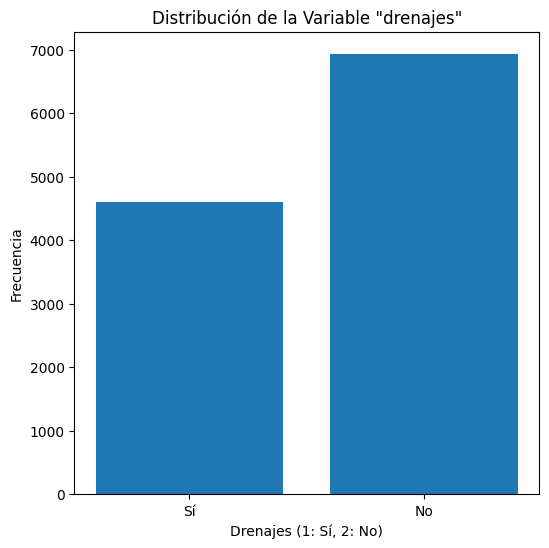

In [31]:
drenajes = datos_hogar['drenajes']

frecuencia = Counter(drenajes)

# Crear un gráfico de barras
plt.figure(figsize=(6, 6))
plt.bar(frecuencia.keys(), frecuencia.values())
plt.xlabel('Drenajes (1: Sí, 2: No)')
plt.ylabel('Frecuencia')
plt.title('Distribución de la Variable "drenajes"')
plt.xticks(list(frecuencia.keys()), ['Sí', 'No'])  # Personaliza las etiquetas del eje x
plt.show()

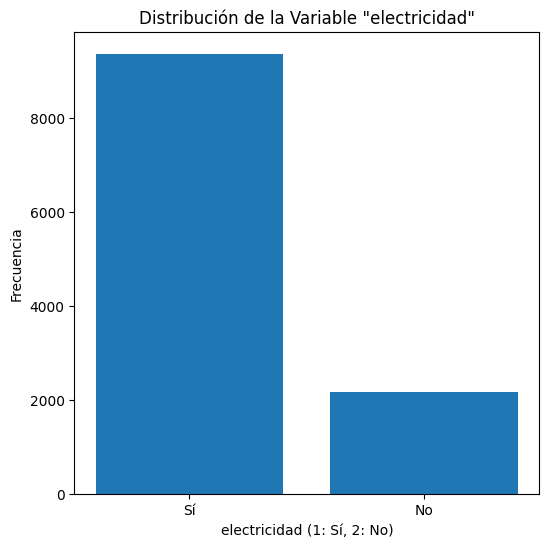

In [32]:
electricidad = datos_hogar['electricidad']

frecuencia = Counter(electricidad)

# Crear un gráfico de barras
plt.figure(figsize=(6, 6))
plt.bar(frecuencia.keys(), frecuencia.values())
plt.xlabel('electricidad (1: Sí, 2: No)')
plt.ylabel('Frecuencia')
plt.title('Distribución de la Variable "electricidad"')
plt.xticks(list(frecuencia.keys()), ['Sí', 'No'])  # Personaliza las etiquetas del eje x
plt.show()

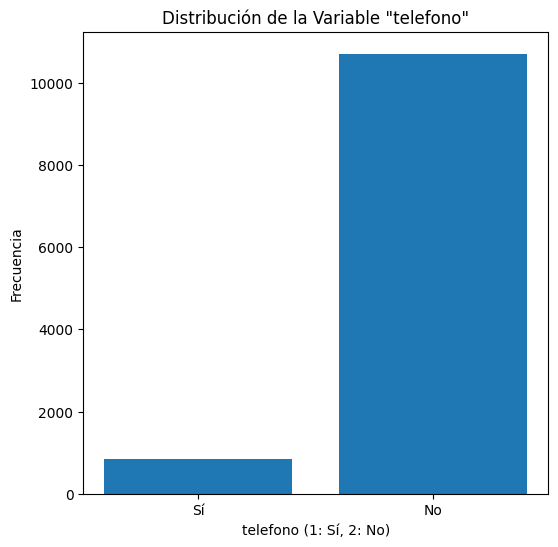

In [33]:
telefono = datos_hogar['telefono']

frecuencia = Counter(telefono)

# Crear un gráfico de barras
plt.figure(figsize=(6, 6))
plt.bar(frecuencia.keys(), frecuencia.values())
plt.xlabel('telefono (1: Sí, 2: No)')
plt.ylabel('Frecuencia')
plt.title('Distribución de la Variable "telefono"')
plt.xticks(list(frecuencia.keys()), ['Sí', 'No'])  # Personaliza las etiquetas del eje x
plt.show()

## Parte 2: Modelado y Pruebas

Decidimos realizar un modelo de clasificación que sirva para predecir el tipo de contrato de vivienda basándonos en características específicas de hogares y personas, como la pobreza, el tamaño del hogar, los servicios públicos, el sueldo, el precio de la vivienda, entre otros.

1. Preparación de Datos :
- Dividir el conjunto de datos en entrenamiento y prueba.
- Estandarización o normalización de variables si es necesario.

In [34]:
# Importar las bibliotecas necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV


# Combina los conjuntos de datos en base a la columna 'UPM'
datos_combinados = pd.merge(datos_hogar, datos_personas, on='UPM')

# Columnas relevantes para la clasificación
columnas_clasificacion = ['POBREZA_x', 'NUMHOG_x', 'FACTOR_x', 'cocinan', 'total_personas',
                           'agua', 'drenajes', 'electricidad', 'telefono', 'contrato', 'sueldo', 'precio_vivienda']

datos_seleccionados = datos_combinados[columnas_clasificacion]

# Manejar los valores faltantes
datos_seleccionados = datos_seleccionados.dropna()

# Conjunto de datos en entrenamiento y prueba
X = datos_seleccionados.drop('contrato', axis=1)
y = datos_seleccionados['contrato']

# Manejar variables categóricas
X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Estandarización de variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

2. Construcción del Modelo:
- Elegir un modelo de aprendizaje automático adecuado para la tarea.
- Justificar la elección del modelo.
- Entrenar el modelo con el conjunto de datos.

In [35]:
# Modelo RandomForestClassifier
modelo = RandomForestClassifier(random_state=42, class_weight='balanced')

# Entrenar el modelo
modelo.fit(X_train_scaled, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

3. Evaluación del Modelo:
- Utilizar métricas adecuadas para evaluar el modelo (e.g., precisión, recall, F1-score).

In [36]:
# Realizar predicciones en el conjunto de prueba
y_pred = modelo.predict(X_test_scaled)

# Evaluar el rendimiento del modelo
precision = accuracy_score(y_test, y_pred)
informe_clasificacion = classification_report(y_test, y_pred)

print(f"Precisión del modelo: {precision}")
print("Informe de Clasificación:")
print(informe_clasificacion)

Precisión del modelo: 0.9793213149522799
Informe de Clasificación:
              precision    recall  f1-score   support

          NO       0.98      0.99      0.99      1377
          SI       0.97      0.96      0.96       509

    accuracy                           0.98      1886
   macro avg       0.98      0.97      0.97      1886
weighted avg       0.98      0.98      0.98      1886



4. Optimización y Ajuste:
- Ajustar hiperparámetros.
- Evaluar la mejora en el desempeño del modelo.

In [37]:
# Ajustar hiperparámetros con GridSearchCV
parametros_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), parametros_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Obtener el mejor modelo después de la búsqueda en la cuadrícula
mejor_modelo = grid_search.best_estimator_

# Predicciones con el mejor modelo
y_pred_optimizado = mejor_modelo.predict(X_test_scaled)

# Evaluar el rendimiento del modelo optimizado
precision_optimizado = accuracy_score(y_test, y_pred_optimizado)
informe_clasificacion_optimizado = classification_report(y_test, y_pred_optimizado)

print("Mejor modelo después de la búsqueda en la cuadrícula:")
print(mejor_modelo)
print(f"\nPrecisión del modelo optimizado: {precision_optimizado}")
print("Informe de Clasificación para el modelo optimizado:")
print(informe_clasificacion_optimizado)


Mejor modelo después de la búsqueda en la cuadrícula:
RandomForestClassifier(n_estimators=200, random_state=42)

Precisión del modelo optimizado: 0.9809119830328739
Informe de Clasificación para el modelo optimizado:
              precision    recall  f1-score   support

          NO       0.98      0.99      0.99      1377
          SI       0.97      0.95      0.96       509

    accuracy                           0.98      1886
   macro avg       0.98      0.97      0.98      1886
weighted avg       0.98      0.98      0.98      1886



# Parte 3

**Reflexion**

Desafios: 

Un desafio encontrado fue seleccionar las caracteristicas a utilizar en el modelo. Ya que estas podian afectar en la transformacion futura

Lecciones Aprendidas:

- Importancia de la limpieza de datos, porque pueden darse problematicas en el futuro
- Buena eleccion de metricas para el modelo


Potencial de aplicacion en el ambito profesional:

- Se pueden tomar decisiones basadas en datos, lo cual ayuda a elegir decisiones 
- Este tipo de temas pueden abarcar varios ambitos y topicos, por lo cual puede ser un plus para futuras investigaciones como las del desarrollo del pais.